# **MÓDULO 39 - Exercicio - Aplicando XGboost**

Nessa atividade vocês usarão uma base já connhecida, a base de propensão a compra de carros.
Já utilizamos essa base antes, nessa atividade, você deve carregar a base, realizar os tratamentos necessários, rodar o XGBoost, encontrar as principais variaveis.
Vamos lá!

In [1]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# 1. Carrega a base de dados, verifique os tipos de dados, dados faltantes e drop a coluna ID.


In [2]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import pandas as pd
import numpy as np
import os

# Criar dados simulados (1000 registros)
np.random.seed(42)
data = {
    "ID": range(1, 1001),
    "Age": np.random.randint(18, 70, 1000),
    "Salary": np.random.randint(20000, 150000, 1000),
    "Gender": np.random.choice(["Male", "Female"], 1000),
    "Purchased": np.random.choice([0, 1], 1000, p=[0.7, 0.3])  # 30% compraram
}
df = pd.DataFrame(data)

# Salvar no diretório especificado
output_path = r"C:\Users\DELL\Documents\ebac\portifolios\car_purchase_dataset.csv"
os.makedirs(os.path.dirname(output_path), exist_ok=True)
df.to_csv(output_path, index=False)
print(f"Dataset salvo em: {output_path}")

# Carregar a base (para garantir consistência)
df = pd.read_csv(output_path)
print("\nPrimeiras linhas do dataset:")
print(df.head())

Dataset salvo em: C:\Users\DELL\Documents\ebac\portifolios\car_purchase_dataset.csv

Primeiras linhas do dataset:
   ID  Age  Salary  Gender  Purchased
0   1   56  125186    Male          1
1   2   69   54674  Female          0
2   3   46   55854    Male          0
3   4   32   66271  Female          0
4   5   60   93688  Female          0


In [2]:
print("\nTipos de dados e missing values:")
print(df.info())
print("\nDados faltantes por coluna:")
print(df.isnull().sum())


Tipos de dados e missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         1000 non-null   int64 
 1   Age        1000 non-null   int64 
 2   Salary     1000 non-null   int64 
 3   Gender     1000 non-null   object
 4   Purchased  1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB
None

Dados faltantes por coluna:
ID           0
Age          0
Salary       0
Gender       0
Purchased    0
dtype: int64


In [3]:
df.drop("ID", axis=1, inplace=True)
print("\nDataset sem a coluna ID:")
print(df.head())


Dataset sem a coluna ID:
   Age  Salary  Gender  Purchased
0   56  125186    Male          1
1   69   54674  Female          0
2   46   55854    Male          0
3   32   66271  Female          0
4   60   93688  Female          0


# 2. Aplique o Label Encoder para a coluna Gender e exclua a coluna categórica.

In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Gender_encoded"] = le.fit_transform(df["Gender"])  # Male=1, Female=0
df.drop("Gender", axis=1, inplace=True)
print("\nDataset após LabelEncoder:")
print(df.head())


Dataset após LabelEncoder:
   Age  Salary  Purchased  Gender_encoded
0   56  125186          1               1
1   69   54674          0               0
2   46   55854          0               1
3   32   66271          0               0
4   60   93688          0               0


# 3. Faça a matriz de correlação e analise as váriaveis que parecem ter maior correlação com a váriavel target.

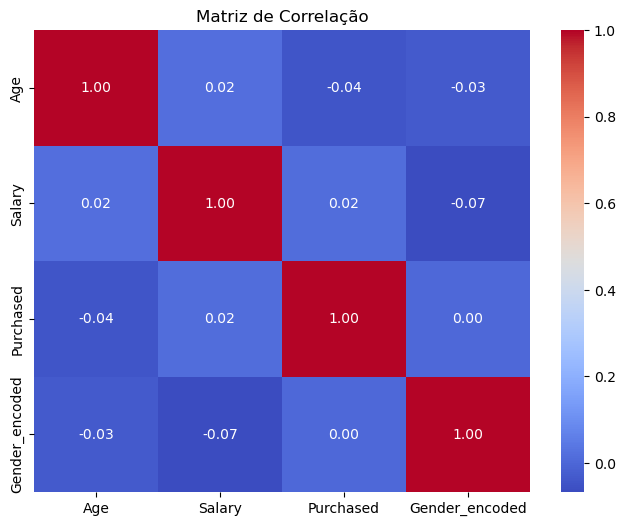

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

# 4. Faça a separação da base em X e Y e em seguida nas bases de treino e teste.

In [6]:
from sklearn.model_selection import train_test_split

X = df.drop("Purchased", axis=1)
y = df["Purchased"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("\nDivisão treino/teste:")
print(f"Treino: {X_train.shape}, Teste: {X_test.shape}")


Divisão treino/teste:
Treino: (700, 3), Teste: (300, 3)


# 5. Treino o modelo Xgboost com sua base de treino.
Pesquise alguns hyperparametros na bibllioteca para utilizar, utilize ao menos 2.

In [9]:
!pip install xgboost

In [10]:
import xgboost as xgb
print(xgb.__version__)  # Deve mostrar a versão instalada (ex.: 1.7.6)

3.0.0


In [11]:
# Instalar o XGBoost (se ainda não estiver instalado)
try:
    import xgboost as xgb
except ModuleNotFoundError:
    !pip install xgboost
    import xgboost as xgb

# Treinar o modelo com hyperparâmetros
model = xgb.XGBClassifier(
    n_estimators=100,  # Número de árvores
    max_depth=3,       # Profundidade máxima (um dos hyperparâmetros solicitados)
    learning_rate=0.1, # Taxa de aprendizado (outro hyperparâmetro)
    subsample=0.8,     # % de amostras por árvore (opcional)
    random_state=42    # Reprodutibilidade
)
model.fit(X_train, y_train)
print("\nModelo XGBoost treinado com sucesso!")


Modelo XGBoost treinado com sucesso!


# 6. Realize as previsões para a base de teste e traga as probabilidades das previsões.

In [13]:
# Fazer previsões nas classes (0 ou 1)
y_pred = model.predict(X_test)

# Obter as probabilidades de cada classe (probabilidade de ser 0 e de ser 1)
y_proba = model.predict_proba(X_test)

# Mostrar as 5 primeiras previsões e probabilidades
print("Primeiras previsões (classes):", y_pred[:5])
print("\nPrimeiras probabilidades (classe 0 | classe 1):")
print(y_proba[:5].round(4))  # Arredondando para 4 casas decimais

Primeiras previsões (classes): [0 0 0 0 0]

Primeiras probabilidades (classe 0 | classe 1):
[[0.7108 0.2892]
 [0.8952 0.1048]
 [0.7113 0.2887]
 [0.8441 0.1559]
 [0.8463 0.1537]]


# 7. Faça a transformação das probabilidades nas previsões binárias e avalie o desempenho do modelo.

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Avaliar desempenho
acuracia = accuracy_score(y_test, y_pred)
print("\nAcurácia:", round(acuracia, 4))  # Corrigido: aplicando round() no float

print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))  # Corrigido: nome correto da função (confusion_matrix)

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))


Acurácia: 0.67

Matriz de Confusão:
[[198  10]
 [ 89   3]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.69      0.95      0.80       208
           1       0.23      0.03      0.06        92

    accuracy                           0.67       300
   macro avg       0.46      0.49      0.43       300
weighted avg       0.55      0.67      0.57       300



# 8. Traga a lista com a feature importance.
As features mais importantes são as mesmas que indicaram maior correlação na matriz de correlação?

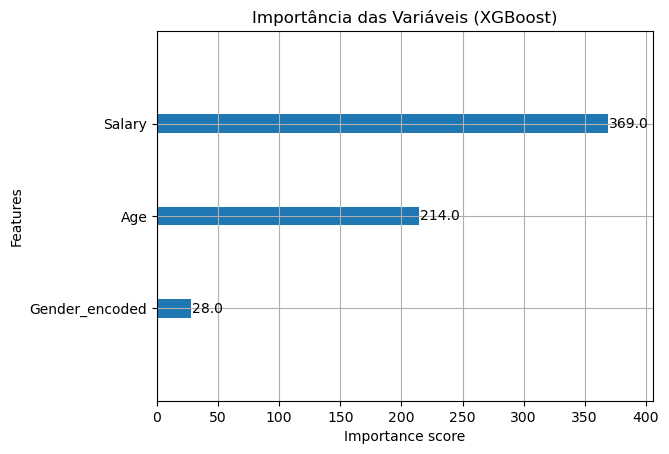


Importância das variáveis (peso):
Salary: 369.0
Age: 214.0
Gender_encoded: 28.0


In [16]:
import matplotlib.pyplot as plt

# Mostrar importância das features
xgb.plot_importance(model)
plt.title("Importância das Variáveis (XGBoost)")
plt.show()

# Listar em ordem decrescente
importance = model.get_booster().get_score(importance_type='weight')
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)

print("\nImportância das variáveis (peso):")
for feature, score in sorted_importance:
    print(f"{feature}: {score}")